In [1]:
library(ADM)
source("./functions.R")
dataset = "Brain5k"  ## Gutierrez  Oihane Quake  Brain5k   mir  kidney  Spleen metabolism  gene
dataload = dataloader(dataset)
dat = dataload$dat
info = dataload$info
path = paste0("../dataset/",dataset,"/")

Loading required package: Matrix


Attaching package: ‘uwot’


The following object is masked from ‘package:umap’:

    umap


Loading required package: MASS

Loading required package: survival


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:igraph’:

    crossing


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The follo

## Calculating dimension reduction results

In [2]:
#  calculate  indivadual outputs
candidate.out = candidate.visual(dat, dim = 3, method=c("PCA", "MDS", "iMDS", "Sammon", "HLLE", "Isomap", 
                                                  "kPCA", "LEIM", "UMAP", "tSNE","PHATE","KEF"),tsne.perplexity = c(10, 30))
e<-candidate.out[[1]]
name = candidate.out[[2]]
save(e, file=paste0(path,"all embeded dim 3.bin"))  

#  calculate meta outputs
load(paste0(path,"all embeded dim 3.bin"))
ensemble.out = ensemble.viz(e, names(e))
mev.out = mev(e, dist.power=dist.power, conn.prop=conn.prop,diffu.factor = diffu.factor)
CCI <- cal_cci(ensemble.out, mev.out)
save(ensemble.out, file=paste("./Data/",dataset,"metaspec_out.Rdata"))
save(mev.out, file=paste("./Data/",dataset, "adm_out.Rdata"))
save(CCI, file=paste("./Data/",dataset,"CCI.Rdata"))

In [3]:
load(paste0(path,"all embeded dim 3.bin"))
load(paste0(path, "Data/", " ", dataset, " metaspec_out.Rdata"))
load(paste0(path,"Data/ ", dataset, " adm_out.Rdata"))
load(paste0(path,"Data/ ", dataset, " CCI.Rdata"))
k = length(unique(info))
label_mapping <- get_mapping(dataset)

### Results visulization of individual techniques

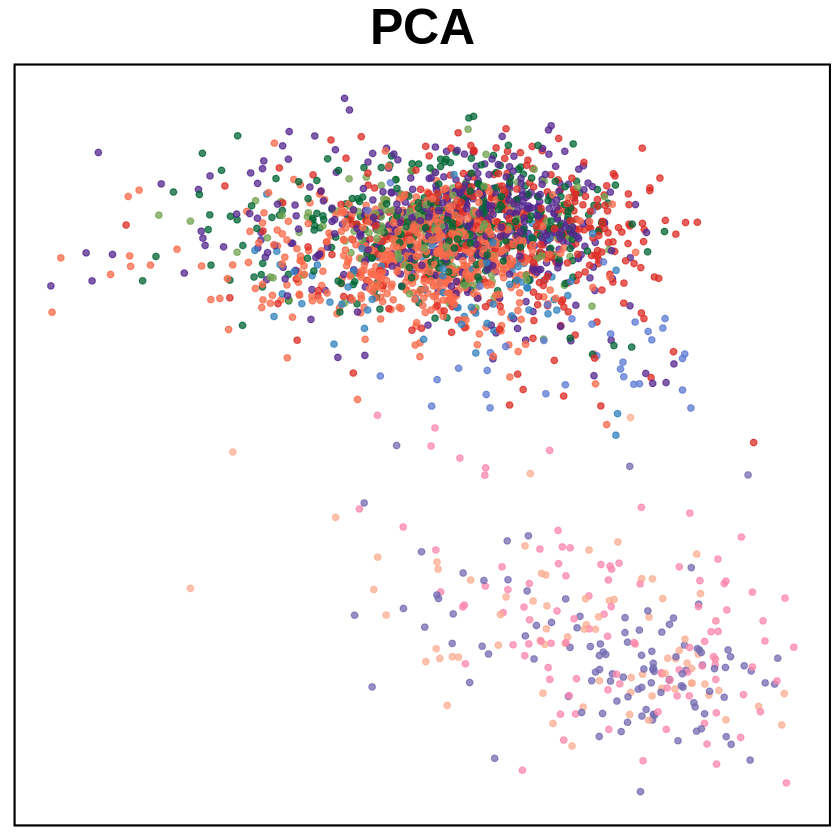

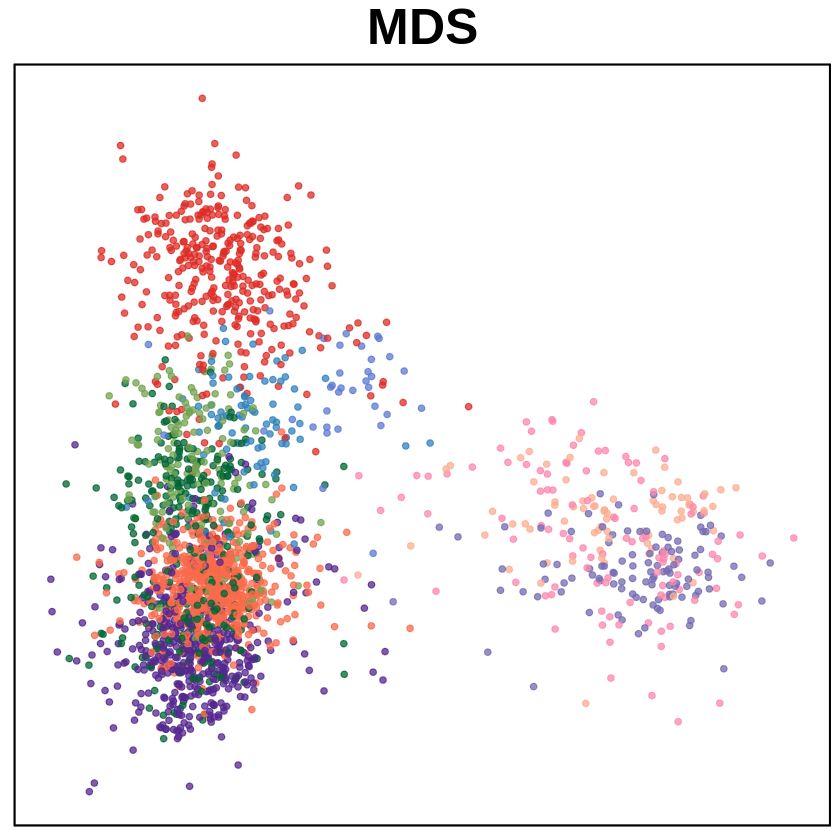

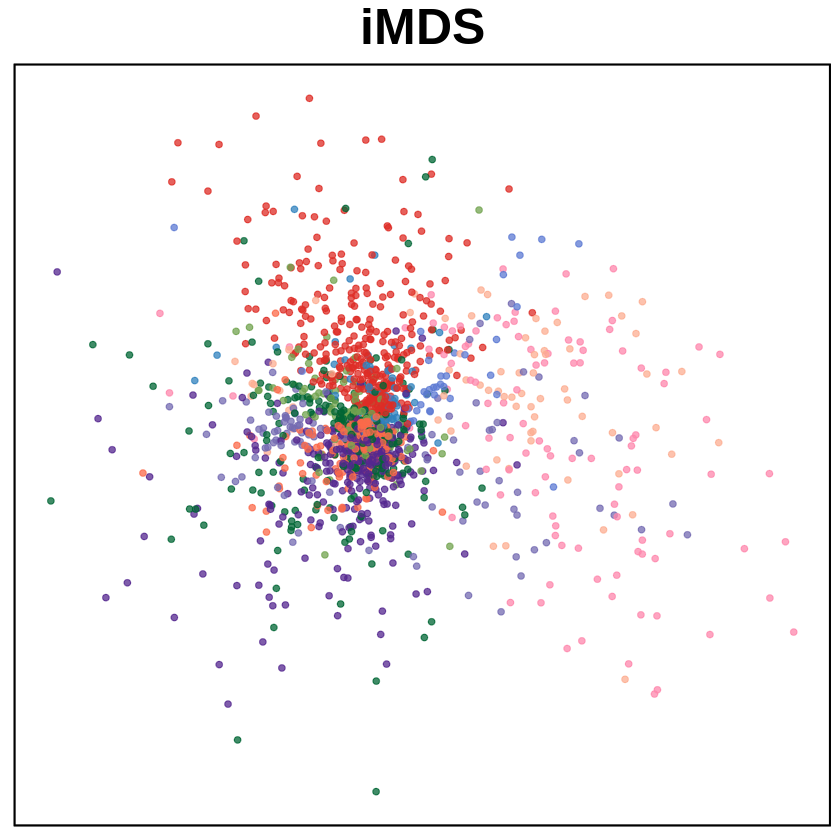

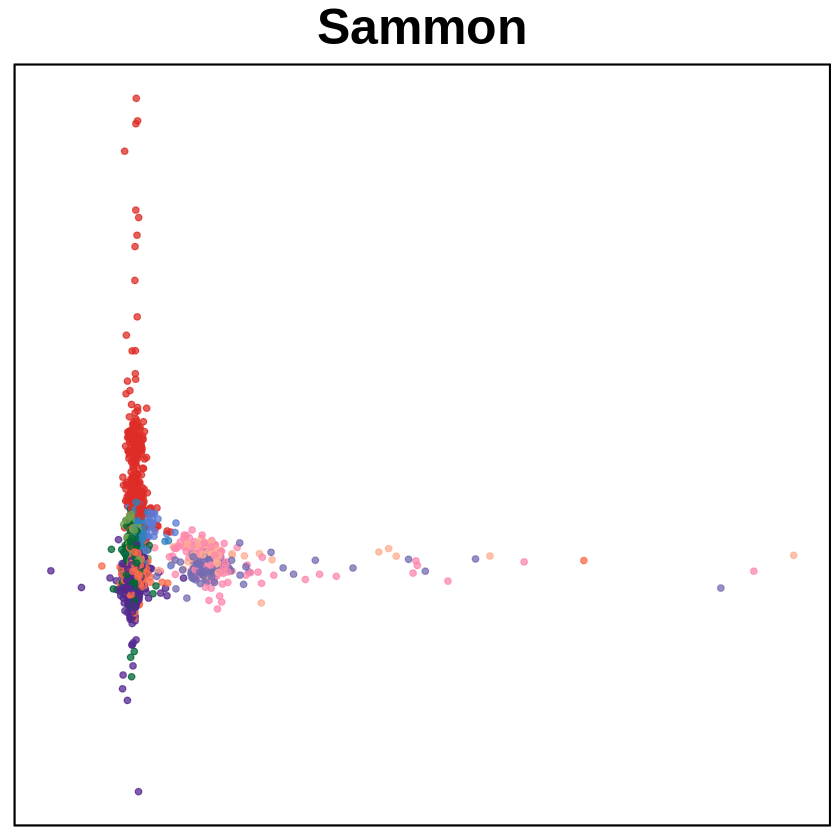

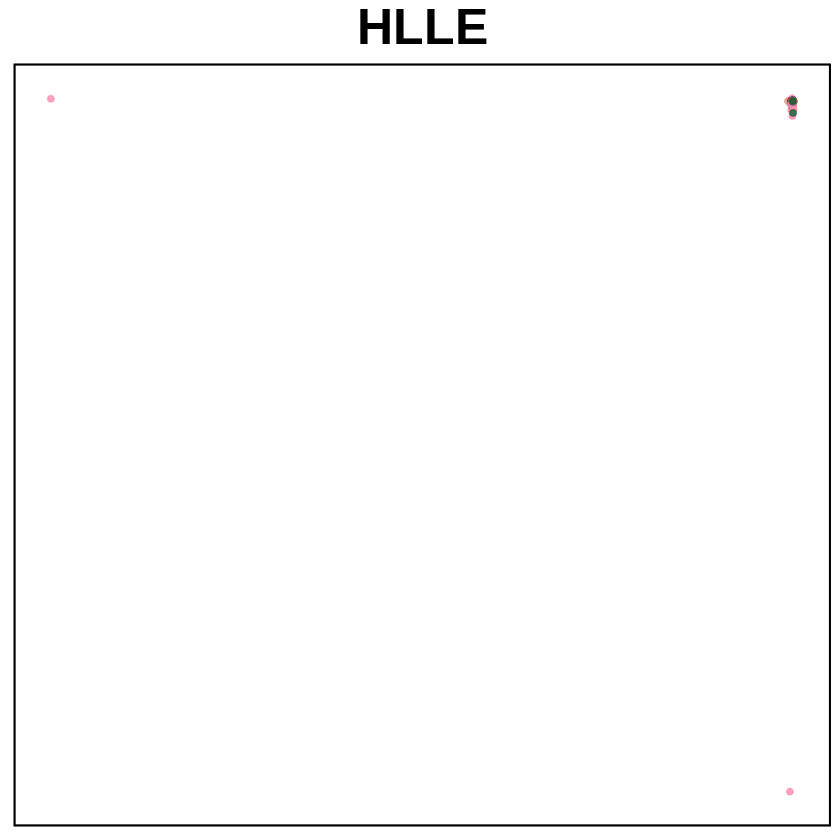

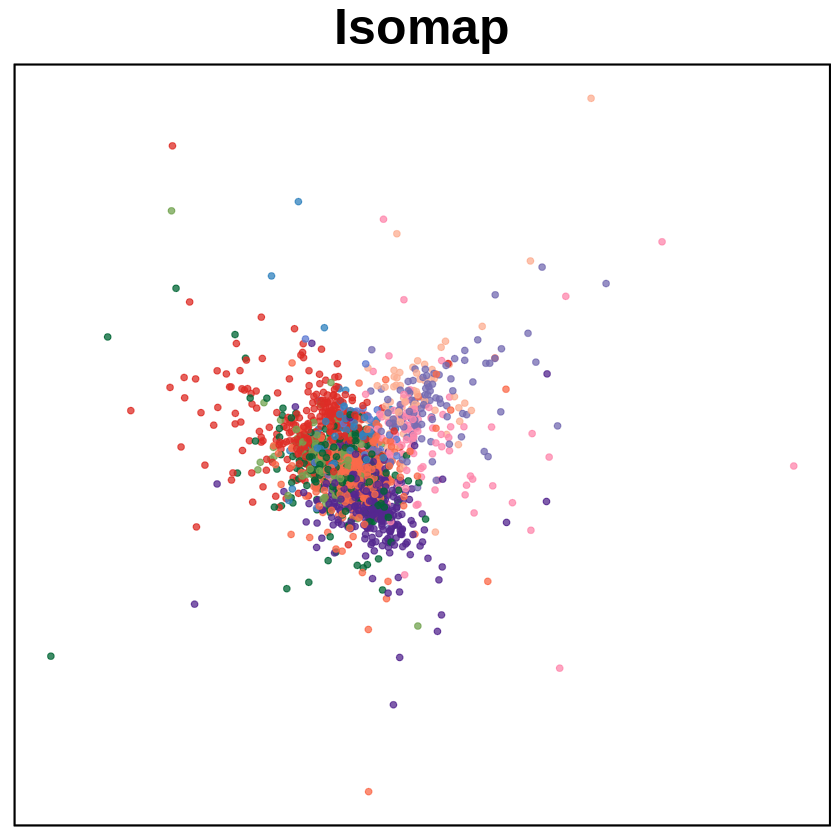

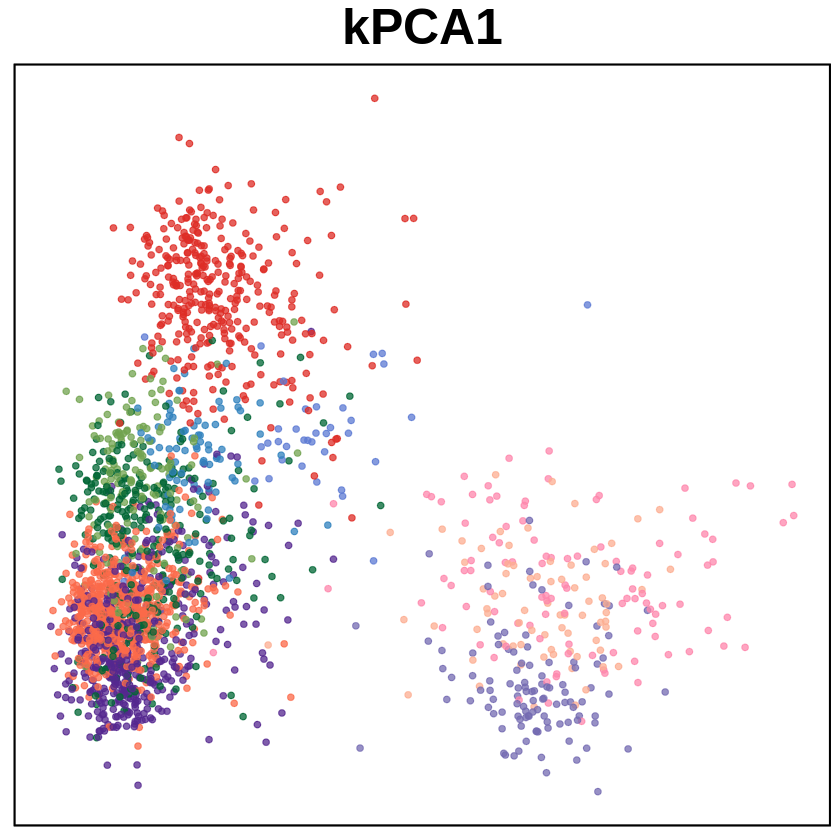

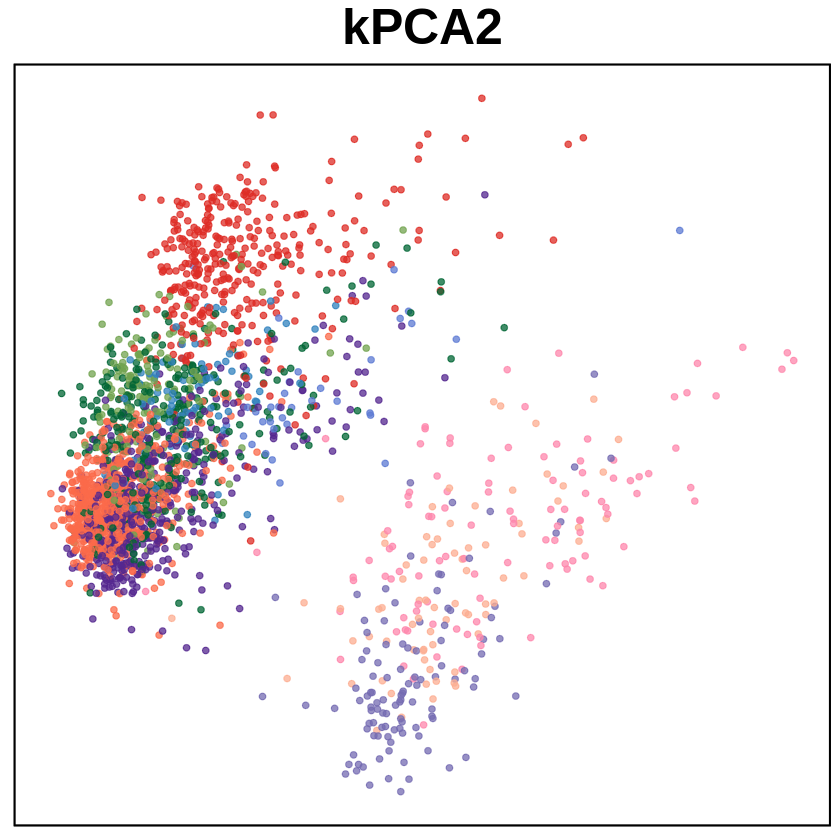

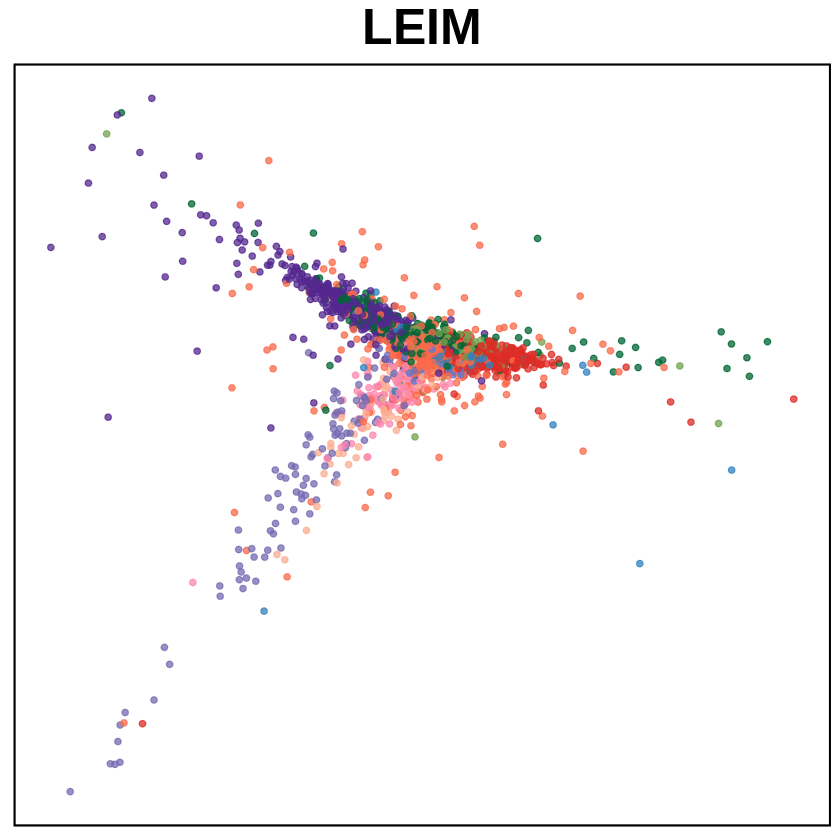

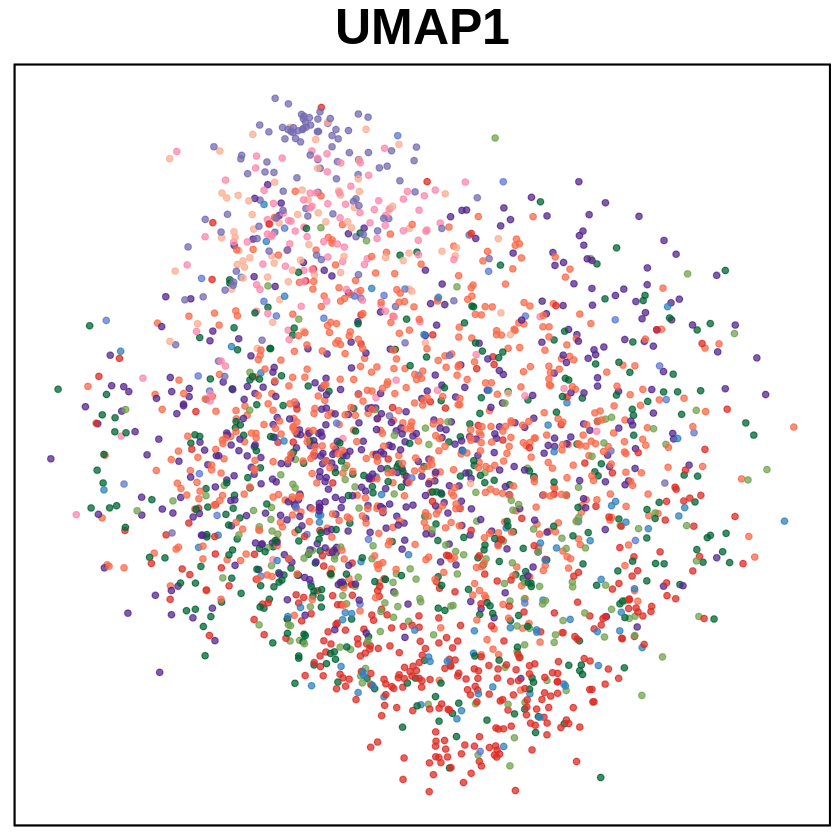

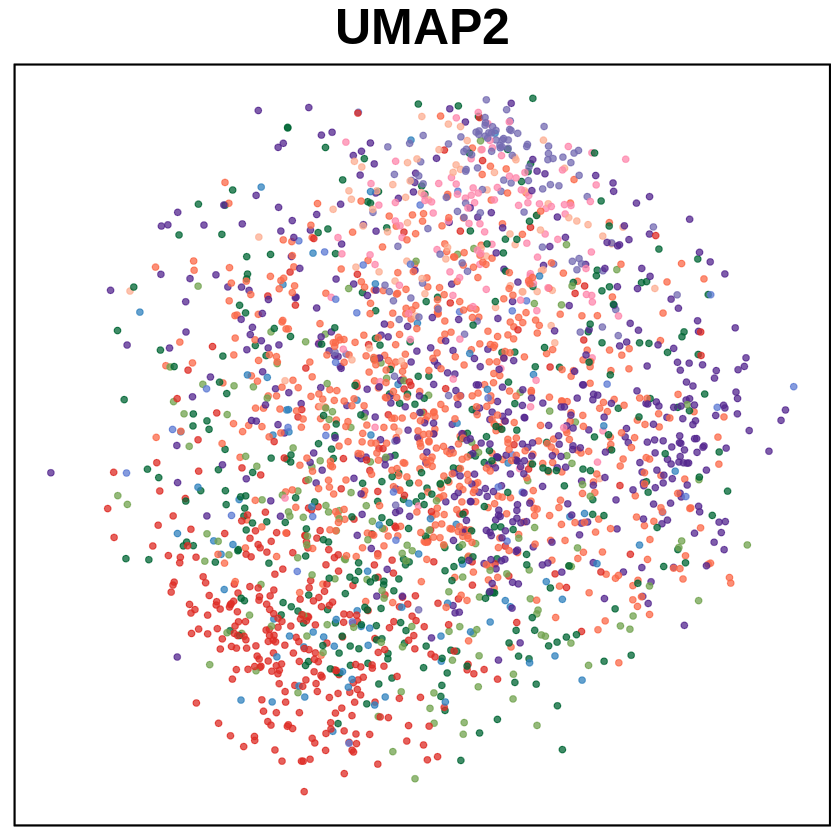

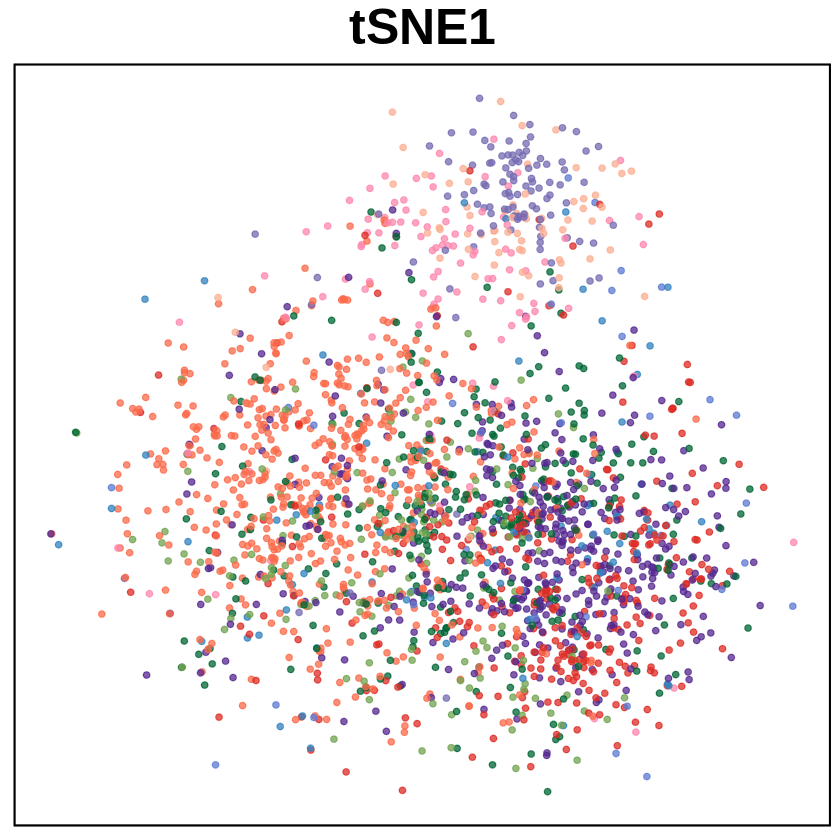

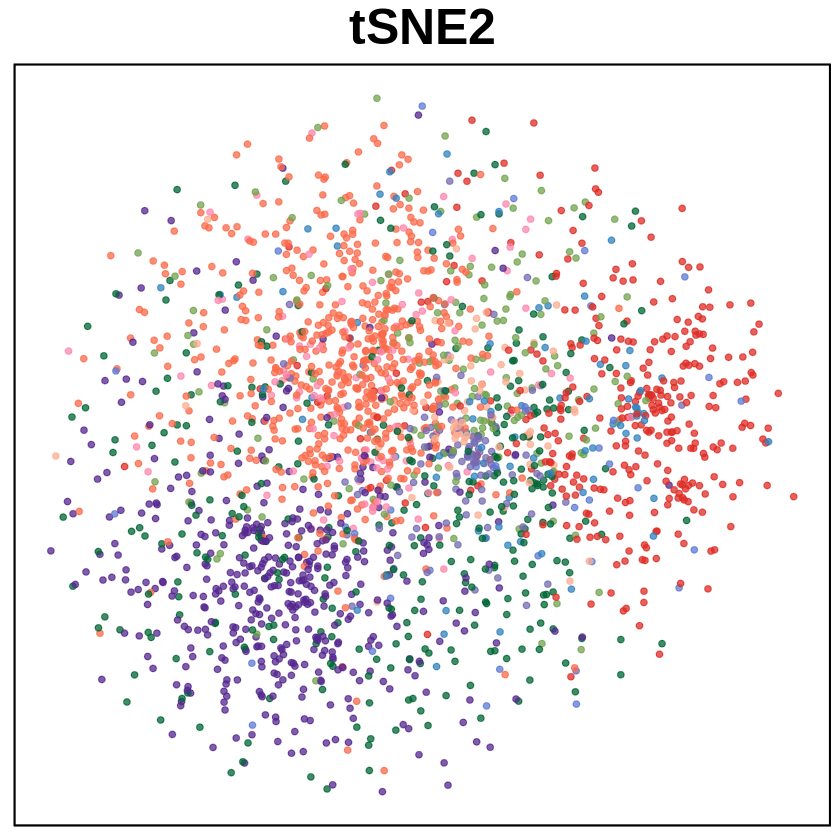

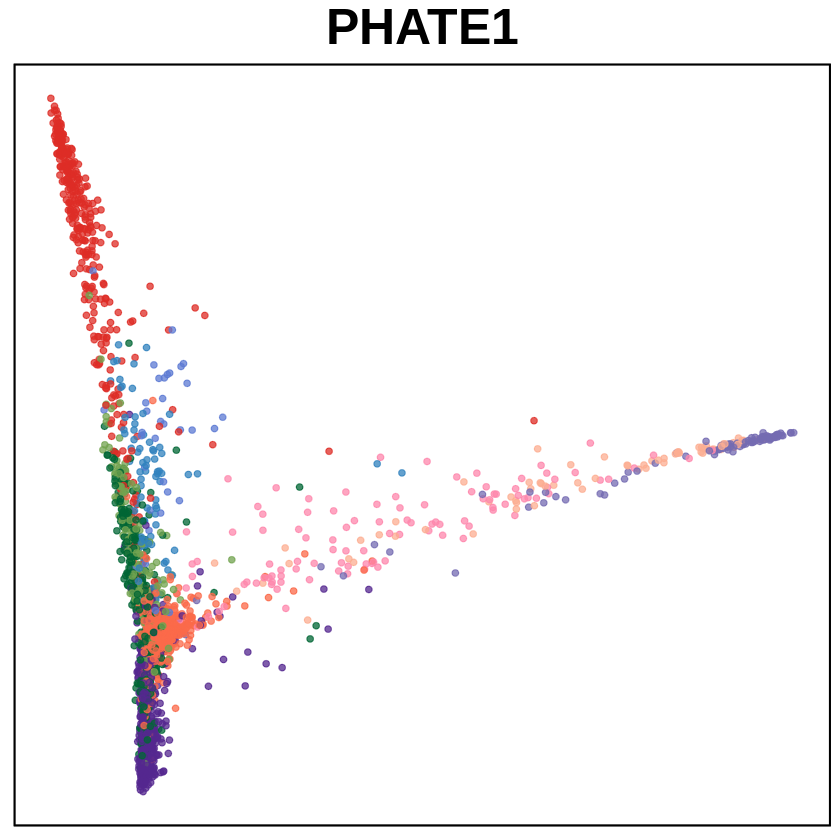

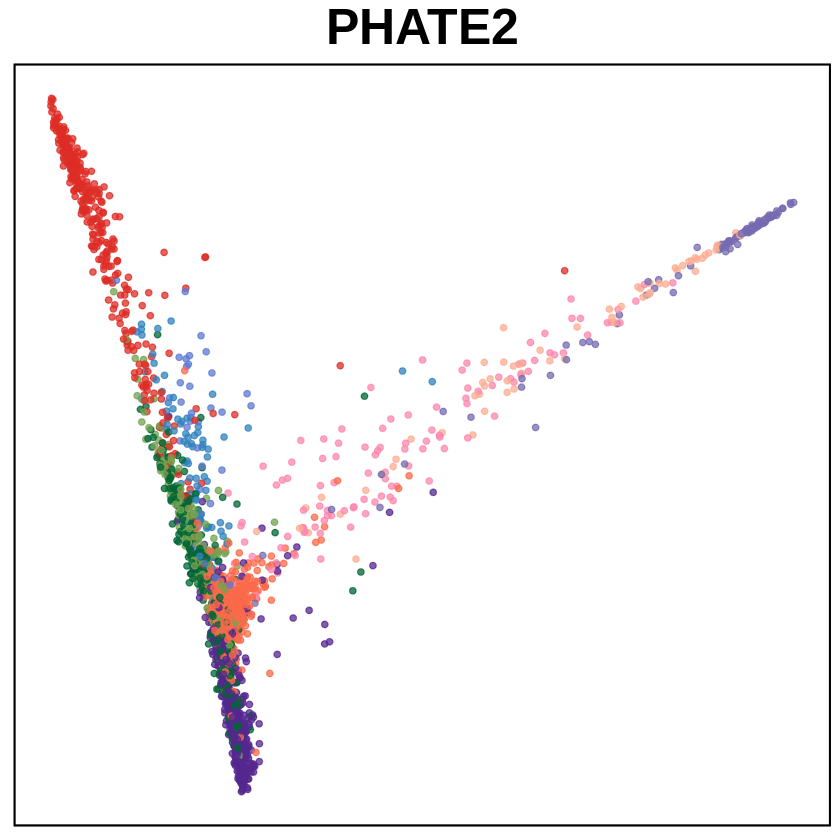

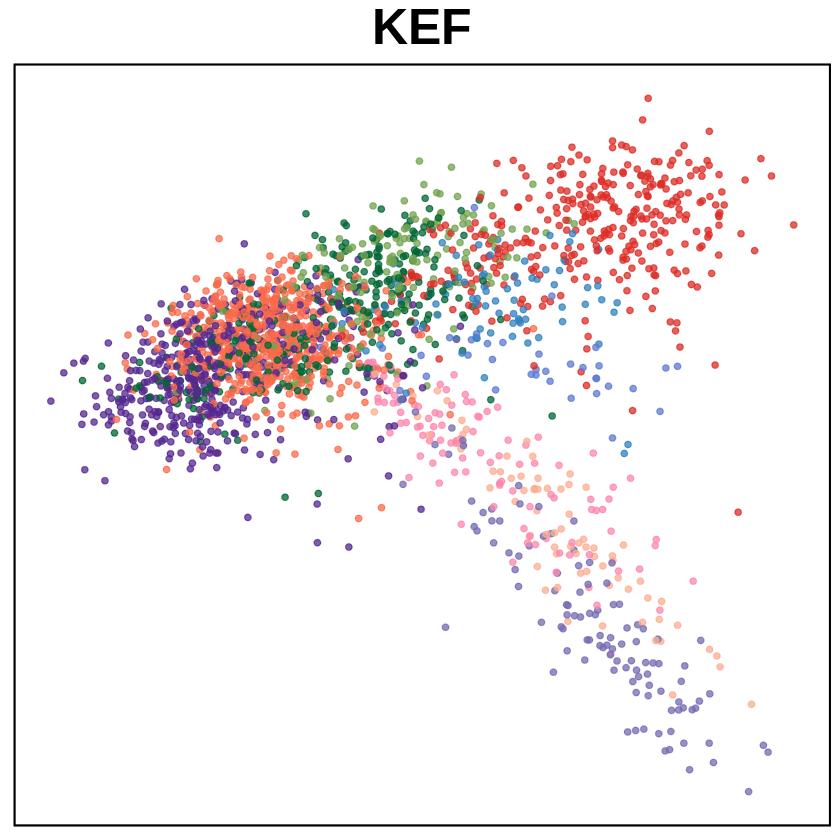

In [4]:
visualize_individual_methods(e, names_list, seed = 2024)

### Results visulization of meta techniques

[1] "Running R version:4.3.1"
[1] "package:uwot" "package:umap"
[1] "Using umap package"
[1] ‘0.2.10.0’
[1] "kmeans function source: package:stats"
[1] "kmeans is available from stats package (R base)"
[1] "R version: 4.3.1"
        ARI       NMI
1 0.3453479 0.5018691
****** ADM ******
        ARI       NMI
1 0.5152592 0.5343643


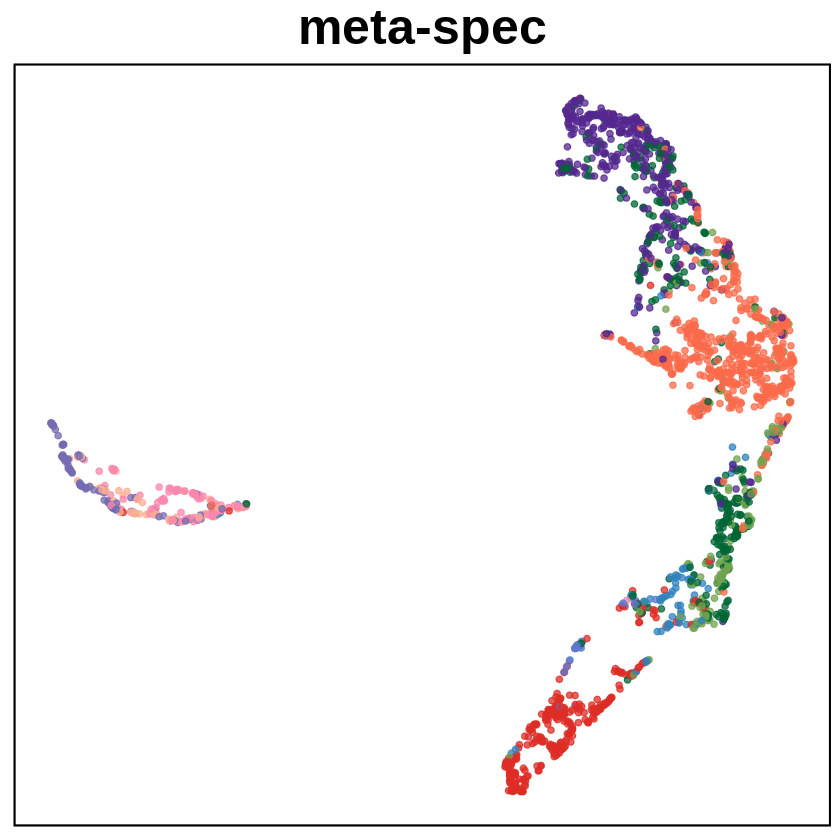

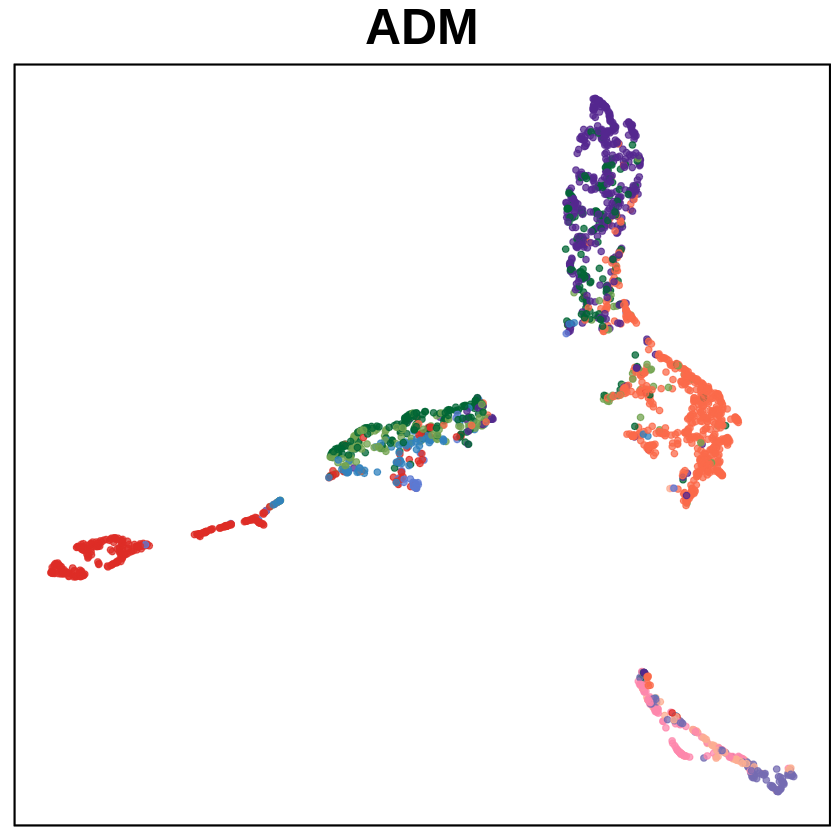

In [5]:
results = process_and_visualize_meta_methods(ensemble.out, mev.out, info, k, color_list,seed = 2024)

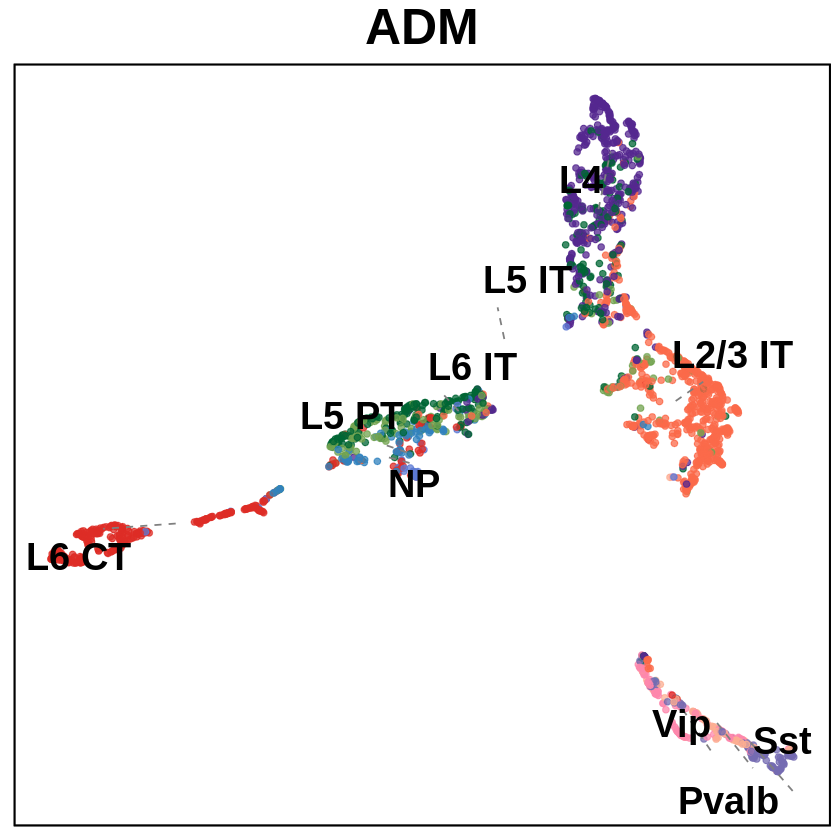

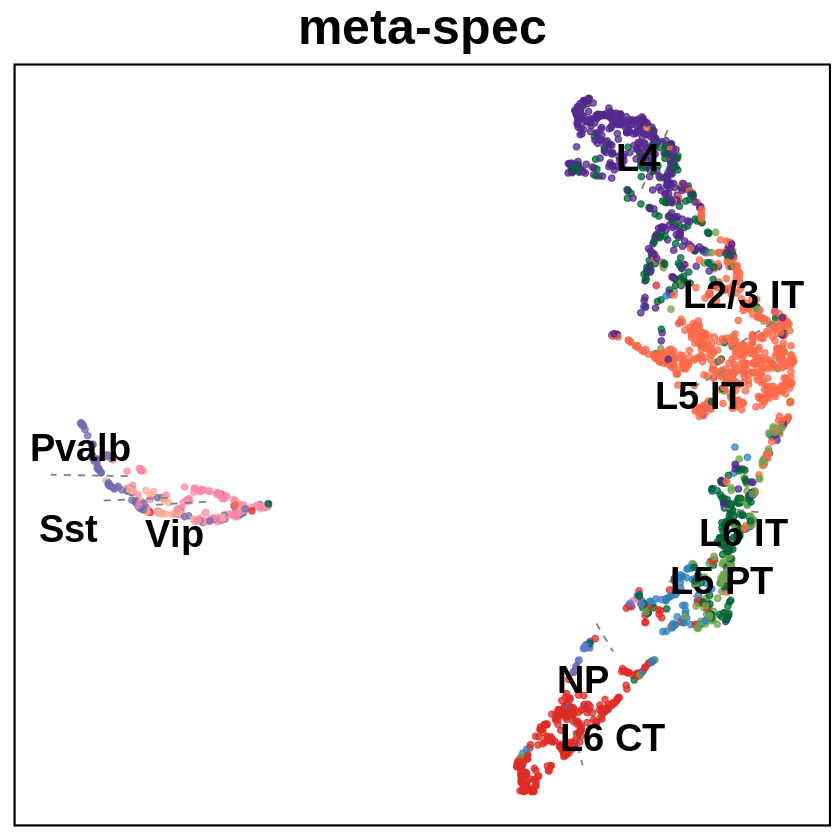

In [6]:
visualization_with_label(results[[4]], "ADM", info, dataset, color_list)
visualization_with_label(results[[3]], "meta-spec", info, dataset, color_list)   

### Quantative analysis of individual techniques

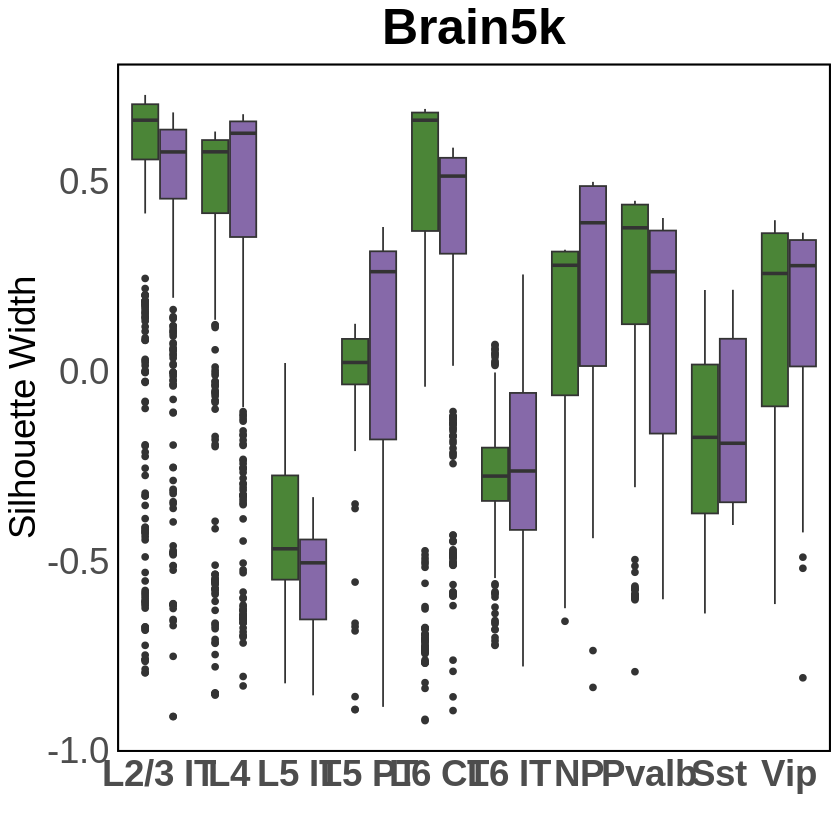

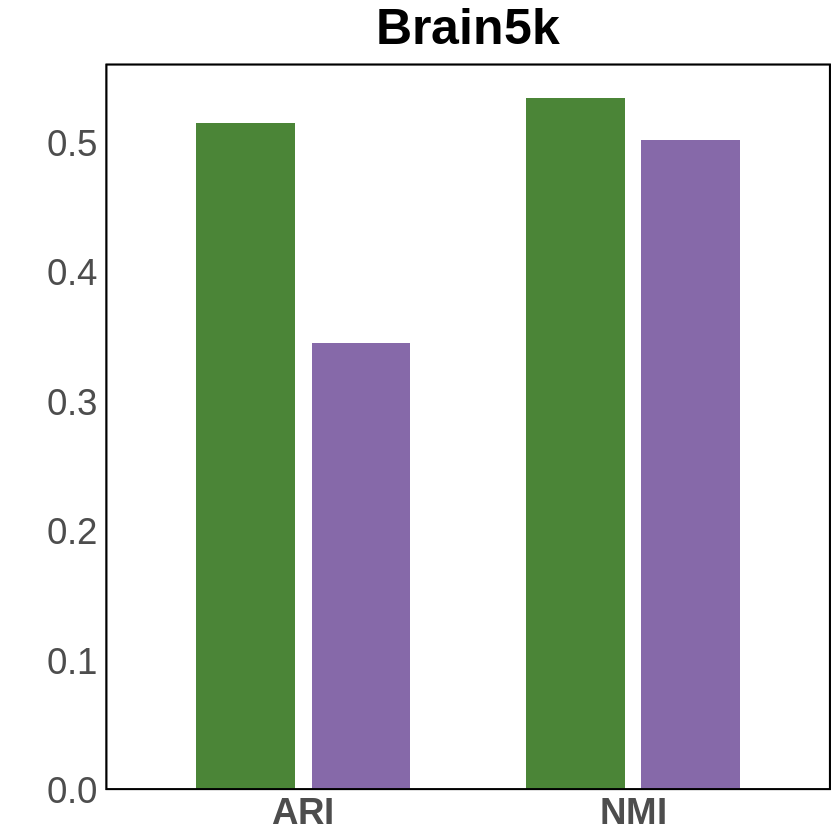

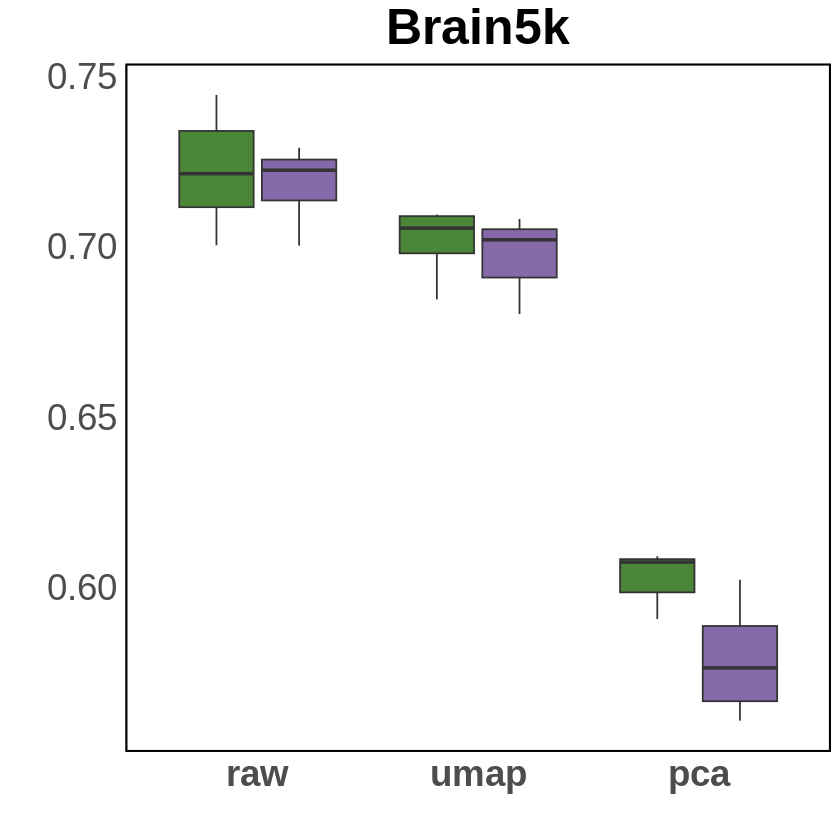

In [7]:
visualize_silhouette_width(results[[2]], info,dataset,label_mapping)
visualize_ari_nmi(results[[1]], dataset)
plot_cci_results(rec, dataset)